In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../')
from src.dataset import read_folder
from src.visualization import plot_img

In [3]:
from scipy.spatial import Delaunay

# Load example data

In [4]:
# define Path
PATH = '../LaPa/train'

In [5]:
# load few examples
images = read_folder(PATH, n = 10, landmarks= 'landmarks', RGB = True)

In [6]:
# choose images to example process
example_img = list(images.keys())[3]

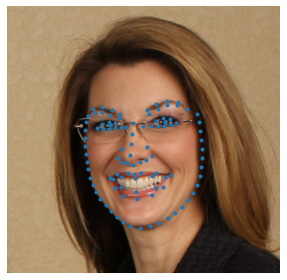

In [10]:
# plot image with landmarks
plot_img(images[example_img]['img'])
plt.plot(images[example_img]['landmarks']()[:,0] , images[example_img]['landmarks']()[:,1], '.')
plt.axis('off')
plt.tight_layout()
plt.show()

# Delaunay triangulation

In [12]:
# apply triangulation of a set of points (landmarks), result are triangles defined by point indices and coordinates
triangles = Delaunay(images[example_img]['landmarks']())

In [12]:
# point indices and coordinates for the three triangles forming the triangulation
triangles.simplices[:3]

array([[41, 33, 34],
       [90, 28, 27],
       [22, 21, 91]], dtype=int32)

In [17]:
# visualization triplots have been created by triangulation
def plot_landmarks_triplot(landmarks, triangles, without_img = True, ax = plt):
    ax.triplot(landmarks[:,0], landmarks[:,1] * ((-1) ** without_img), triangles.simplices, 'k--')
    ax.axis('off')

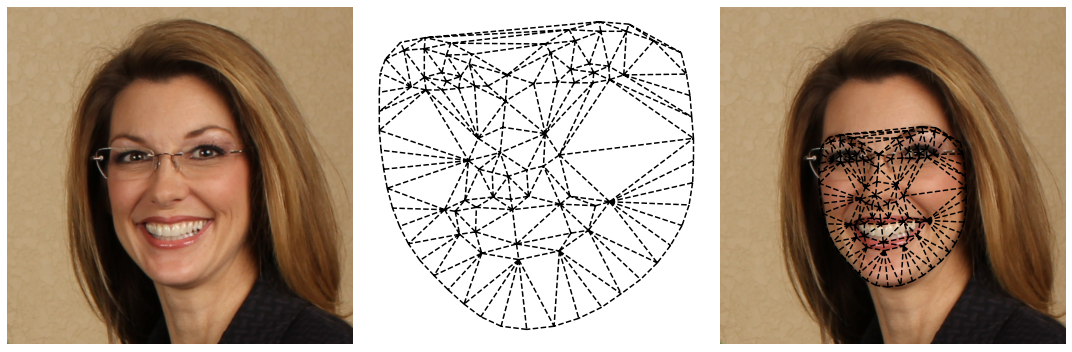

In [19]:
# plot image with triplot mask
f, ax = plt.subplots(1,3, figsize=(15,5))
plot_img(images[example_img]['img'], ax = ax[0])
plot_landmarks_triplot(images[example_img]['landmarks'](), triangles, ax = ax[1])
plot_img(images[example_img]['img'], ax = ax[2])
plot_landmarks_triplot(images[example_img]['landmarks'](), triangles, False, ax = ax[2])
plt.tight_layout()
plt.show()

**it is worth noting** - even if the face is not perfectly symmetrical, we would expect the triangular mask of centered face should be symmetrical (for the sake of points). Unfortunately, using triangularization, we cannot be sure that it will be so.

In [20]:
# CONTOURS = list(range(33))
# LEFT_EYEBROWN = list(range(33,42))
# REIGHT_EYEBROWN = list(range(42,51))
# NOSE_POINTS = list(range(51,66))
# NOSE_LINE_POINTS = list(range(51,55))
# LEFT_EYE = list(range(66,75))
# REIGHT_EYE = list(range(75,84))
# UPPER_LIP = list(range(84,91))
# BOTTOM_LIP = list(range(91,96))
# TEETH = list(range(96,104))
# EYE = list(range(104,106))

In [21]:
# def add_to_sym(symmetry, temp_reight, temp_left, reverse = True):
#     temp = list(temp_reight)
#     if reverse:
#         temp.reverse()
#     temp_left = temp_left
#     for i in range(len(temp_left)):
#         symmetry[temp_left[i]] = temp[i]
#         symmetry[temp[i]] = temp_left[i]
#     return symmetry

In [22]:
# symmetry = {}
# for i in range(int(len(CONTOURS)/2)+1):
#     symmetry[CONTOURS[i]] = CONTOURS[-i]
#     symmetry[CONTOURS[-i]] = CONTOURS[i]

    
# symmetry = add_to_sym(symmetry, REIGHT_EYEBROWN[:5], LEFT_EYEBROWN[:5])
# symmetry = add_to_sym(symmetry, REIGHT_EYEBROWN[5:], LEFT_EYEBROWN[5:])
# symmetry = add_to_sym(symmetry, REIGHT_EYE[:5], LEFT_EYE[:5])
# symmetry = add_to_sym(symmetry, REIGHT_EYE[5:8], LEFT_EYE[5:8])
# symmetry = add_to_sym(symmetry, NOSE_POINTS[4:9], NOSE_POINTS[10:])
# symmetry = add_to_sym(symmetry, NOSE_POINTS[:4] + NOSE_POINTS[9:10], NOSE_POINTS[:4] + NOSE_POINTS[9:10], False)
# symmetry = add_to_sym(symmetry, UPPER_LIP[:3], UPPER_LIP[4:])
# symmetry = add_to_sym(symmetry, BOTTOM_LIP[:2], BOTTOM_LIP[3:])
# symmetry = add_to_sym(symmetry, TEETH[:2], TEETH[3:5])
# symmetry = add_to_sym(symmetry, TEETH[5:7], TEETH[6:])

# symmetry[TEETH[2]] = TEETH[2]
# symmetry[BOTTOM_LIP[2]] = BOTTOM_LIP[2]
# symmetry[UPPER_LIP[3]] = UPPER_LIP[3]
# symmetry[LEFT_EYE[8]] = REIGHT_EYE[8]
# symmetry[REIGHT_EYE[8]] = LEFT_EYE[8]
# symmetry[EYE[0]] = EYE[1]
# symmetry[EYE[1]] = EYE[0]

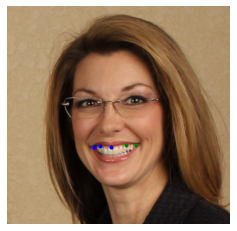

In [617]:
plot_img(images[example_img]['img'])
for i in TEETH[:3]:
    plt.plot(images[example_img]['landmarks'][i][0], images[example_img]['landmarks'][i][1], 'b.')
for i in TEETH[3:5]:
    plt.plot(images[example_img]['landmarks'][i][0], images[example_img]['landmarks'][i][1], 'g.')

In [618]:
UPPER_LIP[4]

88

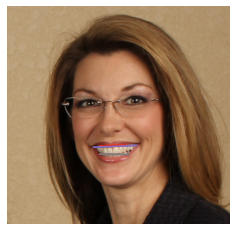

In [619]:
plot_img(images[example_img]['img'])
for i in TEETH[:]:
    plt.plot([images[example_img]['landmarks'][i][0], images[example_img]['landmarks'][symmetry[i]][0]],
             [images[example_img]['landmarks'][i][1], images[example_img]['landmarks'][symmetry[i]][1]], '-')

In [620]:
LEFT_FACE_SIDE =  LEFT_EYEBROWN +\
    CONTOURS[:int(len(CONTOURS)/2)+1] +\
    TEETH[int(len(TEETH)*3/4):] + \
    TEETH[:int(len(TEETH)*1/4 + 1)] +\
    UPPER_LIP[:int(len(UPPER_LIP)*1/2 + 1)] + \
    BOTTOM_LIP[int(len(BOTTOM_LIP)*1/2):] + \
    LEFT_EYE + [EYE[0]] +  NOSE_POINTS[:int(len(NOSE_POINTS)/2)+3]

In [301]:
REIGHT_FACE_SIDE =  REIGHT_EYEBROWN +\
    CONTOURS[int(len(CONTOURS)/2):] +\
    TEETH[int(len(TEETH)*1/4):int(len(TEETH)*3/4)+1] + \
    UPPER_LIP[int(len(UPPER_LIP)*1/2):] + \
    BOTTOM_LIP[:int(len(BOTTOM_LIP)*1/2)+1] + \
    REIGHT_EYE + [EYE[1]] + NOSE_LINE_POINTS +  NOSE_POINTS[int(len(NOSE_POINTS)/2)+2:]

In [302]:
len(LEFT_FACE_SIDE)

58

In [303]:
len(REIGHT_FACE_SIDE)

58

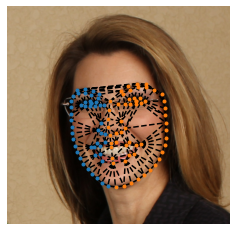

In [314]:
plot_landmarks_triplot(images[example_img]['landmarks'], triangles, False)
plt.imshow(images[example_img]['img'])
plt.plot(images[example_img]['landmarks'][LEFT_FACE_SIDE,0] , images[example_img]['landmarks'][LEFT_FACE_SIDE,1], '.')
plt.plot(images[example_img]['landmarks'][REIGHT_FACE_SIDE,0] , images[example_img]['landmarks'][REIGHT_FACE_SIDE,1], '.')

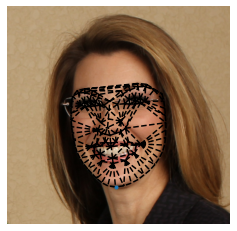

In [315]:
plot_landmarks_triplot(images[example_img]['landmarks'], triangles, False)
plt.imshow(images[example_img]['img'])
plt.plot(images[example_img]['landmarks'][16,0] , images[example_img]['landmarks'][16,1], '.')

In [299]:
def plot_point_color(img1, r):
    plt.imshow(img1)
    plt.plot(r[CONTOURS,0], r[CONTOURS,1], 'b.')
    plt.plot(r[LEFT_EYEBROWN,0], r[LEFT_EYEBROWN,1], 'r.')
    plt.plot(r[REIGHT_EYEBROWN,0], r[REIGHT_EYEBROWN,1], 'g.')
    plt.plot(r[NOSE_POINTS,0], r[NOSE_POINTS,1], 'k.')
    plt.plot(r[LEFT_EYE,0], r[LEFT_EYE,1], '.', color =  'white')
    plt.plot(r[REIGHT_EYE,0], r[REIGHT_EYE,1], '.', color = 'purple')
    plt.plot(r[UPPER_LIP,0], r[UPPER_LIP,1], '.', color =  'pink')
    plt.plot(r[BOTTOM_LIP,0], r[BOTTOM_LIP,1], '.', color =  'orange')
    plt.plot(r[TEETH,0], r[TEETH,1], '.', color =  'yellow')
    plt.plot(r[EYE,0], r[EYE,1], '.', color =  'tab:blue')

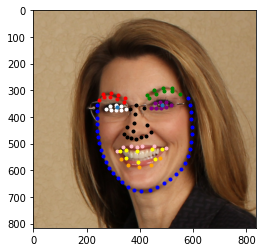

In [541]:
plot_point_color(images[example_img]['img'], images[example_img]['landmarks'])